**AGAIN >> If you use good browser (not IE), you can open this notebook in interactive mode and change everything here.**

Try this link [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikita-p/notebooks/master)

In [1]:
TCanvas *c = new TCanvas("c", "Canvas", 900, 500);

## Functions

In [2]:
TF1 fa1("fa1","sin(x)/x",0,10); //the standard constructor of the user function
        //inner name, function definition, x minimum, x maximum

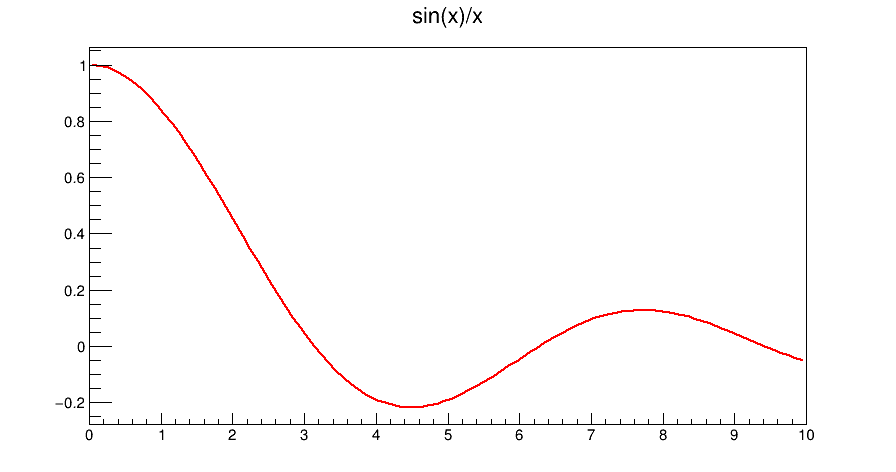

In [3]:
fa1.Draw(); //draw this function
c->Draw(); //draw window

You can see that it is a real $\frac{\sin{x}}{x}$ function 

Now, let's try to use some tricks with functions

In [4]:
double x;

In [5]:
x=1; //define point where we will calculate some metrics

printf("x      = %5.3f\n",x); //print value of x
// %5.3f : 5 means width of the number, .3 means print three decimal points and f means float number

printf("f(x)   = %5.3f \n",  fa1.Eval(x))       ; // evaluate function value
printf("f'(x)  = %5.3f \n",  fa1.Derivative(1.)) ;  // evaluate the first derivative of the function at x
printf("f''(x) = %5.3f \n",  fa1.Derivative2(1.) ); // the second derivative
printf("f'''(x)= %5.3f \n\n",fa1.Derivative3(1.) ); // the third derivative

printf("Integral f(x)= %5.3f \n\n",fa1.Integral(0,10)); // calculate integral in the range (0, 10)

printf("Root of the equation f(x)=y \n");
printf("f(x)= %5.3f   =>   x= %5.3f\n\n",fa1.Eval(1.), fa1.GetX(0.841,0.1,5));
// fa1.GetX(fa1.Eval(1.),1,5)

// find x at the minimum of the function in the range (3, 10)
printf("x_min= %5.3f \n",fa1.GetMinimumX(3.,10.) );

// find x at the maximum of the function in the range (3,10)
printf("x_max= %5.3f \n",fa1.GetMaximumX(3.,10.) );

x      = 1.000
f(x)   = 0.841 
f'(x)  = -0.301 
f''(x) = -0.239 
f'''(x)= 0.177 

Integral f(x)= 1.658 

Root of the equation f(x)=y 
f(x)= 0.841   =>   x= 1.002

x_min= 4.493 
x_max= 7.725 


Now, we will draw an integral and derivative

In [6]:
TCanvas c2("c2","New canvas",800,800); //new canvas
c2.Divide(1,2); //divide c2 canvas into two parts

In [7]:
TF1 *g_dir; //create empty function for a derivative
TF1 *g_int; //empty function for integral

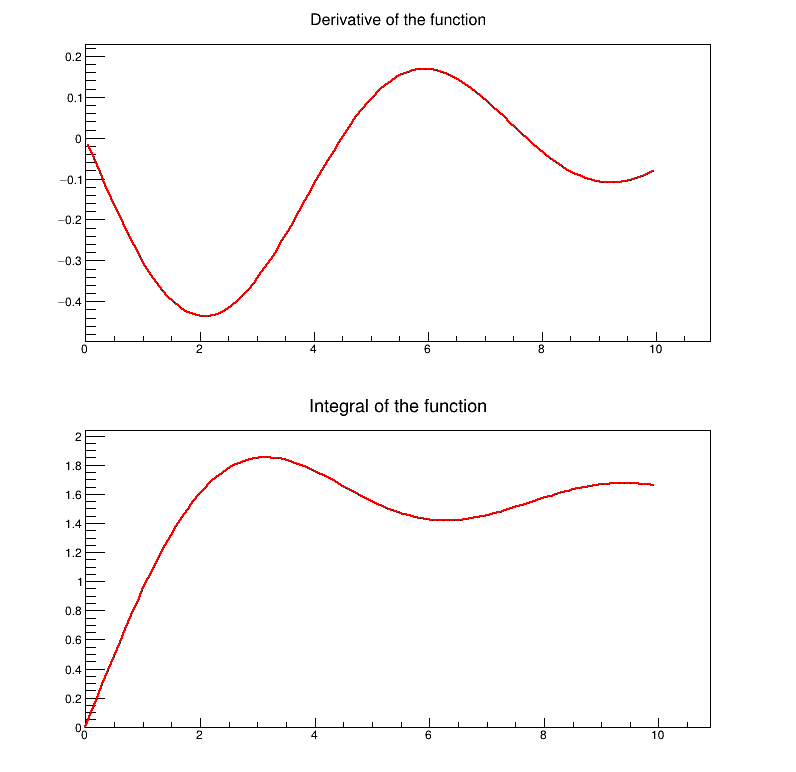

In [8]:
c2.cd(1); //draw in the first window
g_dir = (TF1*)fa1.DrawDerivative(""); //the method "DrawDerivative" means to draw a derivative
//it should be assign 'TF1' type by hand since this method returns object of a 'TObject' type
g_dir->SetTitle("Derivative of the function"); //set title of this function

c2.cd(2); //draw in the second window
g_int = (TF1*)fa1.DrawIntegral(""); //same as in 'DrawDerivative' method
g_int->SetTitle("Integral of the function");

c2.Draw(); //draw canvas

## Functions with parameters

In [9]:
TF1 fa("fa","sin([0]*x)/x/[0]",0,10); //the function with a parameter
//[0] means a parameter of the function

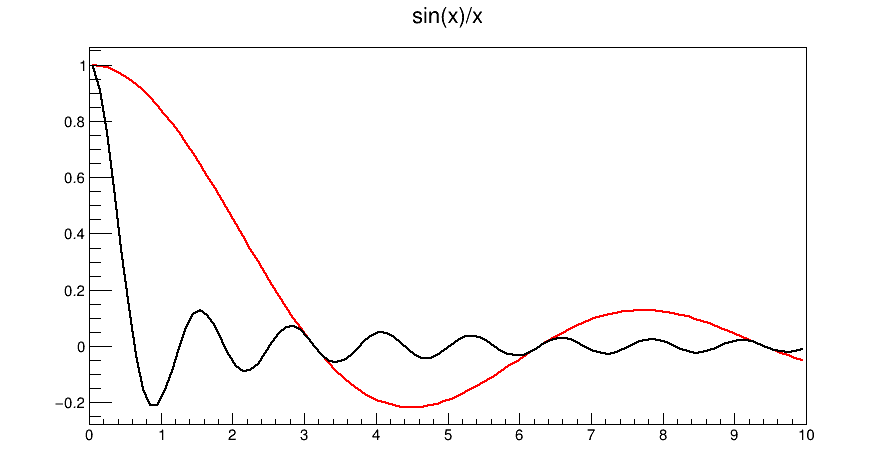

In [10]:
c->Clear(); //clear canvas to draw anything else

fa.SetParameter(0,5); //set parameter 0 with value 15
//fa.SetParameters(5, 5); //set all parameters

fa.SetLineColor(kBlack); //set color of the line (black in this case)
fa1.Draw(""); //draw the previous function
fa.Draw("same"); // draw the function in the same axis
c->Draw();

In the figure you can see $\frac{\sin{x}}{x}$ (red) and  $\frac{\sin{5 x}}{5 x}$ (black)

----------------------------
### User functions

In [11]:
Double_t AsymmetricGaus(Double_t *x, Double_t *par)
    //this is the standard form of the user function
{
    Double_t xx =x[0];
    Double_t mean = par[0];
    Double_t width_left = par[1];
    Double_t width_right = par[2];
    Double_t f;
    if(xx < mean) f = TMath::Gaus(xx, mean, width_left);
    else f = TMath::Gaus(xx, mean, width_right);
    return f;
}

In [12]:
TF1 f1("AsymmetricGaus",AsymmetricGaus,-3,3,3);
        //inner name, function definition, min x, max x, number of parameters

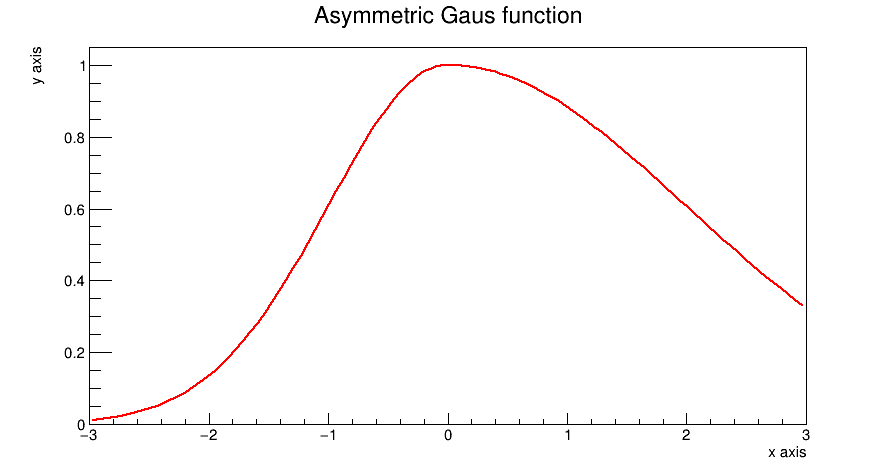

In [13]:
f1.SetParameters(0,1,2); //set all parameters at once
f1.SetTitle("Asymmetric Gaus function; x axis; y axis");
    //before the first semicolumn - function title, then the title of the x-axis, and the title of the y-axis
f1.Draw();
c->Draw();

### Fill histogram with the user function distribution

In [14]:
TH1D hh("hh","",100,-3,3);

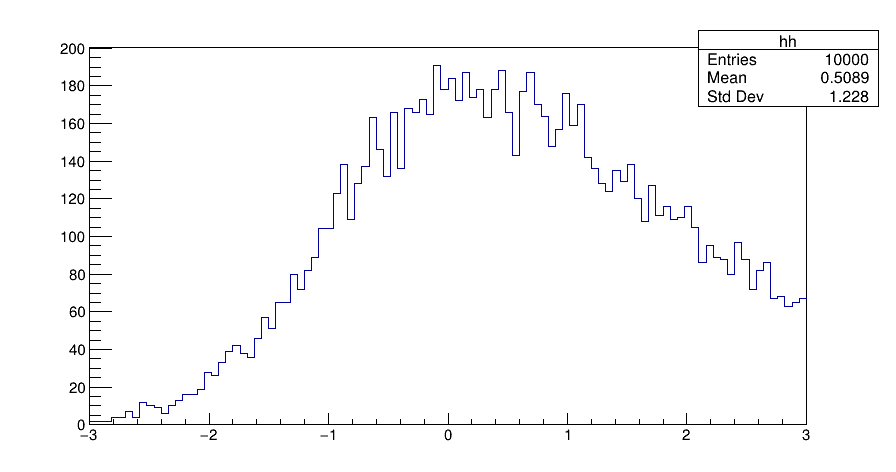

In [15]:
hh.FillRandom("AsymmetricGaus",10000); //fill histogram with the function distribution
hh.Draw();
c->Draw();

### Get function from a histogram

In [16]:
Double_t FuncFromHist(Double_t *x, Double_t *par)
{
    Double_t xx =x[0];
    int bin = hh.FindBin(xx); //get bin by x value
    return hh.GetBinContent(bin); //get number of events in the bin
}

In [17]:
TF1 fh("FuncFromHist", FuncFromHist, -3, 3, 0);

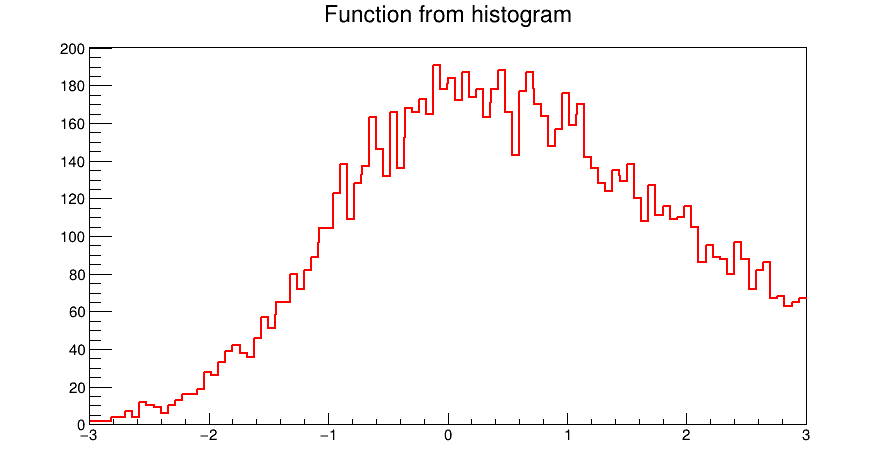

In [18]:
fh.SetNpx(10000); // increase a number of points for better drawing
fh.SetTitle("Function from histogram");
fh.Draw();
c->Draw();

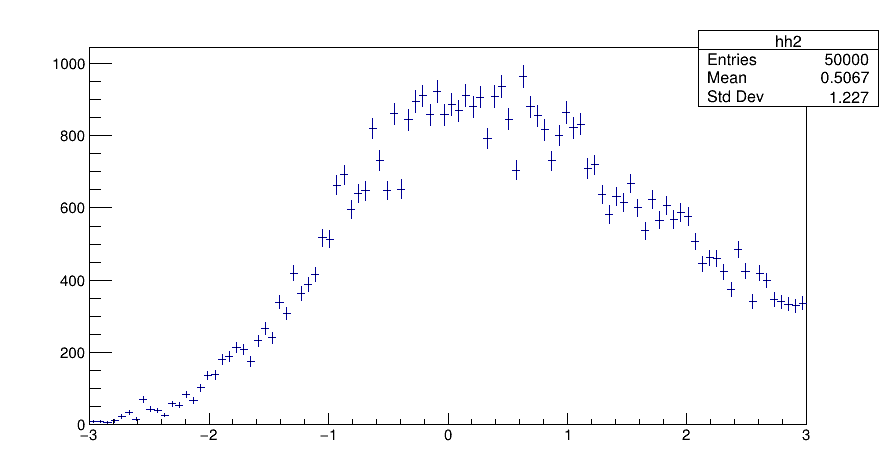

In [19]:
TH1D hh2("hh2","",100,-3,3);
hh2.FillRandom("FuncFromHist", 50000);
hh2.Draw("ep");
c->Draw();

---------------------
## Math libraries

The standard math functions are contained in the `TMath` library

In [20]:
//For example, let's look at some functions
cout<<
    "Pi value: " << TMath::Pi() << endl <<
    "Absolute value of -1: " << TMath::Abs(-1) << endl <<
    "Square root of 2: " << TMath::Sqrt(2) << endl <<
    "Cosine of 0: " << TMath::Cos(0) << endl <<
    "Tangent of 0: " << TMath::Tan(0) << endl <<
    "Breit-Wigner with mean = 0 and width = 1 at x = 0: "<<TMath::BreitWigner(0, 0, 1) << endl <<
    "Error function of 1: " << TMath::Erf(1) << endl;

Pi value: 3.14159
Absolute value of -1: 1
Square root of 2: 1.41421
Cosine of 0: 1
Tangent of 0: 0
Breit-Wigner with mean = 0 and width = 1 at x = 0: 0.63662
Error function of 1: 0.842701


There are also functions for arrays

In [21]:
double a[6] = {1,23,12,47,12,45};

```
cout<<
TMath::MaxElement(6,a)   << endl <<  //print the maximum element of the array
TMath::MinElement(6,a)   << endl <<  //minimum element
TMath::LocMax(6,a)       << endl <<  //print the index of the maximum element
TMath::LocMin(6,a)       << endl;  //index of the minimum element
```
this code doesn't work

----------------
## Legendre polynomials ( extra info [rus](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD%D1%8B_%D0%9B%D0%B5%D0%B6%D0%B0%D0%BD%D0%B4%D1%80%D0%B0) [eng](https://en.wikipedia.org/wiki/Legendre_polynomials) )

In [22]:
gSystem->Load("libMathMore"); //load an additional library to our project since one contains legendre polynomials

In [23]:
TCanvas c3("c3",""); //create new canvas

TLegend *leg = new TLegend(0.5, 0.7, 0.4, 0.89); //create legend of drawing
//the standard constructor takes as arguments the legend block coordinates: top-left x, y and bottom-right x and y 

TF1* L[5]; //define the array of the functions

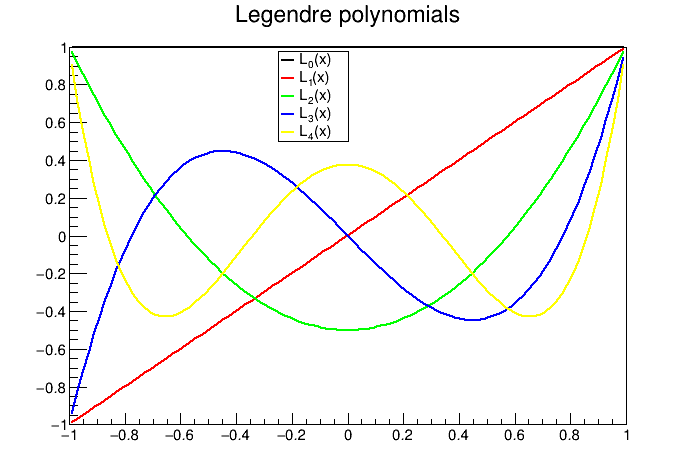

In [24]:
c3.Clear();
leg->Clear();

for(int nu = 0; nu<5; nu++)
{
    L[nu]= new TF1("L0", "ROOT::Math::legendre( [0], x )", -1, 1);
        //create legendre polynomial with an order as a parameter 
    L[nu]->SetParameter(0, nu); //set order as nu
    L[nu]->SetLineStyle(1); //set line style
    L[nu]->SetLineWidth(2); //set width of the line
    L[nu]->SetLineColor(nu+1); //set color of the line
}
L[0]->SetMaximum(1);
L[0]->SetMinimum(-1); //set maximum and minimum of y-axis

L[0]->SetTitle("Legendre polynomials"); //set title of the picture

leg->AddEntry(L[0]->DrawCopy(), " L_{0}(x)", "l"); //draw polynomial and fill legend block
leg->AddEntry(L[1]->DrawCopy("same"), " L_{1}(x)", "l");
leg->AddEntry(L[2]->DrawCopy("same"), " L_{2}(x)", "l");
leg->AddEntry(L[3]->DrawCopy("same"), " L_{3}(x)", "l");
leg->AddEntry(L[4]->DrawCopy("same"), " L_{4}(x)", "l");
leg->Draw(); //draw legend block
c3.Draw();

----------
## Crystal Ball function (extra info [eng](https://en.wikipedia.org/wiki/Crystal_Ball_function))


In [25]:
TF1 f2("f2","ROOT::Math::crystalball_function(x, [0], [1], [2], [3])",-3,3);
//create crystall-ball function

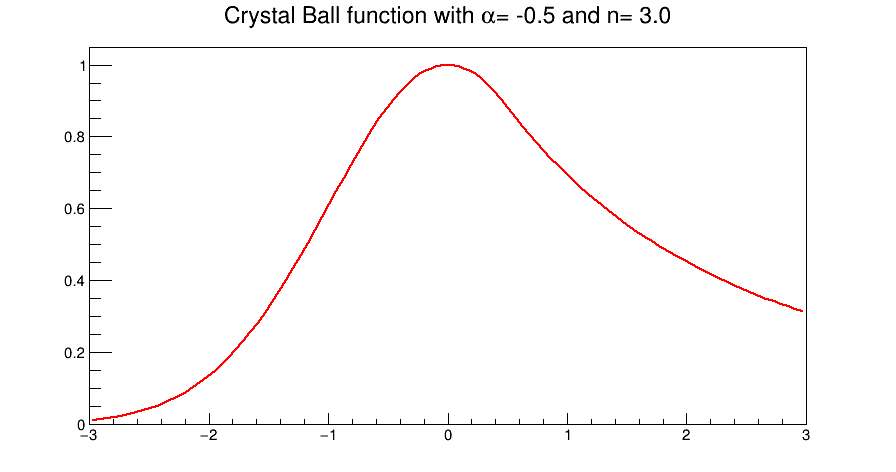

In [26]:
c->Clear();
f2.SetParameters(-0.5, 3, 1, 0); //set all parameters of our crystall ball function
f2.SetTitle( Form("Crystal Ball function with #alpha= %3.1f and n= %3.1f", f2.GetParameter(0),f2.GetParameter(1)) );
                //the standard function Form includes variables in string 
f2.Draw();
c->Draw();

### Three gauss function

In [27]:
TF1 f3("f3","gaus(0)+gaus(3)+gaus(6)",-3,3);
//numbers in gaus mean the start of parameter numbering in each gaus (since every gaus has three parameters 
// we shift the start of numbering on three every time)

f3.SetTitle("Three Gaus functions");
double a1, a2, a3, mean1, mean2, mean3, sigma1, sigma2, sigma3;

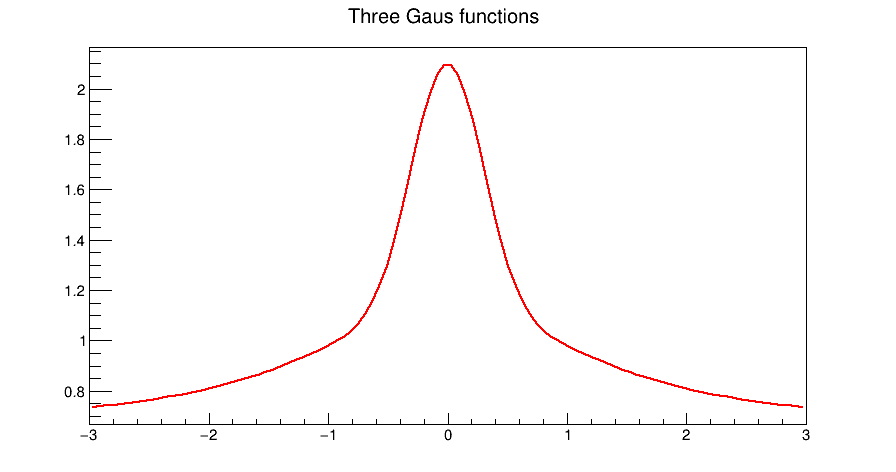

In [28]:
c->Clear();
a1=1;  a2=0.3; a3 =0.8;
mean1=0;    mean2=0;    mean3=0;
sigma1=0.3; sigma2=1.0;  sigma3=7;
f3.SetParameters(a1,mean1,sigma1, a2,mean2,sigma2, a3,mean3,sigma3); //set all parameters in once
f3.Draw();
c->Draw();

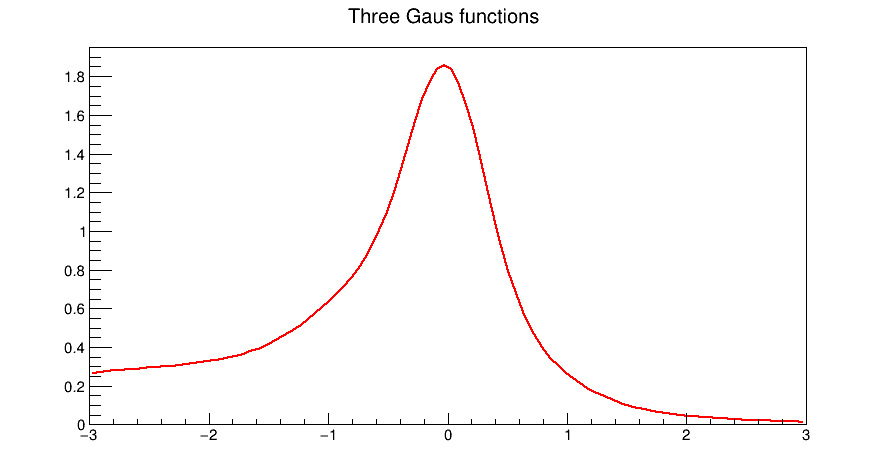

In [29]:
//try to use other values
a1=1;  a2=0.7; a3 =0.3;
mean1=0;    mean2=-0.2;    mean3=-2;
sigma1=0.3; sigma2=0.7;  sigma3=2;
f3.SetParameters(a1,mean1,sigma1, a2,mean2,sigma2, a3,mean3,sigma3);
f3.Draw();
c->Draw();

-----------
## Convolution (extra info [eng](https://en.wikipedia.org/wiki/Convolution), [rus](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BA%D0%B0_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)))

In [30]:
TF1Convolution *f_conv =
    new TF1Convolution("TMath::BreitWigner(x, 0, 1)*TMath::Gaus(x,0,[0],true)",-6,6);
//constructor from a formula expression as f1 * f2 where f1 and f2 are two functions known to ROOT

f_conv->SetNofPointsFFT(10000); //set number of points for fast fourier transform

TF1 *BWC = new TF1("BWC",*f_conv, -6, 6., f_conv->GetNpar()); //create obvious function based on the convolution

TF1 *BW = new TF1("BW","TMath::BreitWigner(x, 0, 1)",-6,6); //create breit-wigner function to compare it

BW->SetTitle("Breit-Wigner convoluted by gaussian");
BW->SetNpx(10000);
BWC->SetNpx(10000);

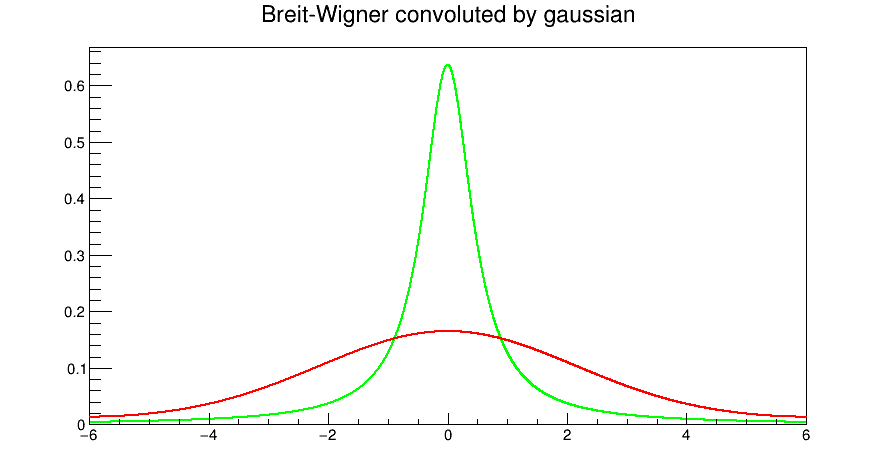

In [31]:
BWC->SetParameters(2,0.); //set all parameters
BW->SetLineColor(kGreen); //set green color of the line
BW->Draw();
BWC->Draw("same");
c->Draw();

That's all.